_Смердов Антон_
## Задача 13
**Условие**: Используя данные о школьниках, выявить степень их алкогольной зависимости. В данных, взятых с UCI 'Students', содержится информация о 30 признаках для каждого школьника, включая социальные и гендерные, а также указана материальная обеспеченность и количество свободного времени. Выбрать на свой взгляд наиболее весомые признаки и предсказать степень употребления алкоголя по выходным или будним по шкале от 0 до 5.

# Attributes for datasets: 
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 sex - student's sex (binary: 'F' - female or 'M' - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 from 5th to 9th grade, 3 secondary education or 4 higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 from 5th to 9th grade, 3  secondary education or 4 higher education)  
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  
13 traveltime - home to school travel time (numeric: 1 - <15 min.,2 - 15 to 30 min.,3 - 30 min. to 1 hour,4 - >1 h)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

**These grades are related with the course subject, Math or Portuguese:**  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)  

In [1]:
import numpy as np
import pandas as pd
from seaborn import *
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.grid_search import GridSearchCV
import xgboost as xgb
import operator
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [2]:
students = pd.read_csv('Data/student-por.csv',sep=';')
students.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


(0.8, 5.2)

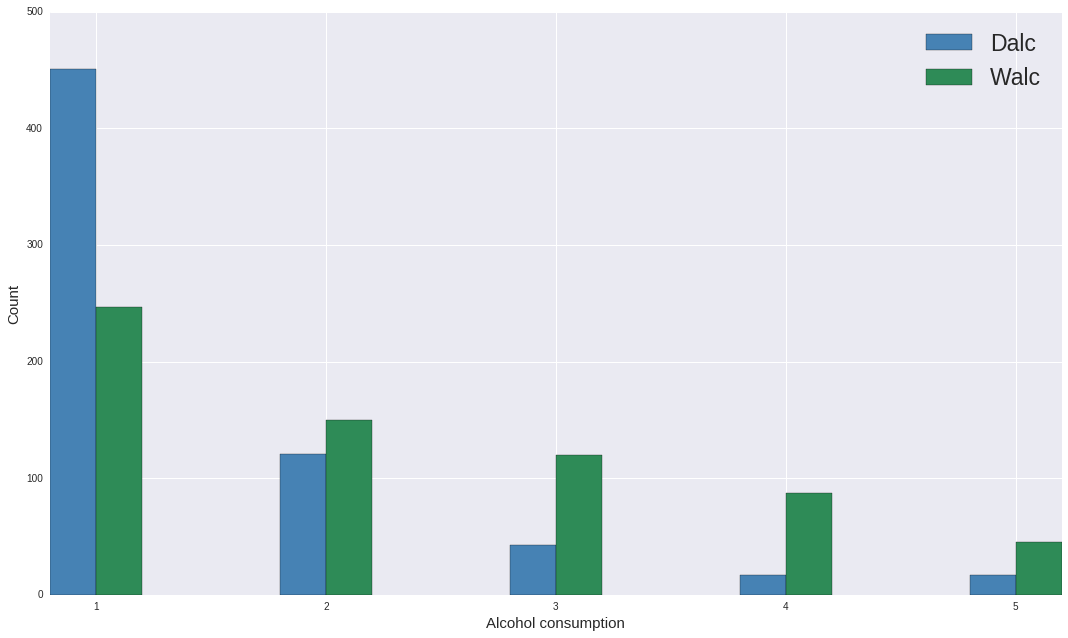

In [3]:
Dalc = np.array(students['Dalc'])
Walc = np.array(students['Walc'])
students = students.drop(['Dalc','Walc'],axis=1)

sns.set(rc={"figure.figsize": (15, 9)})
bar_width = 0.2
plt.bar(-bar_width+np.arange(1,6),pd.value_counts(Dalc),bar_width,label='Dalc',color='steelblue')
plt.bar(np.arange(1,6),pd.value_counts(Walc),bar_width,label='Walc',color='seagreen')
plt.xlabel('Alcohol consumption',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(np.arange(1,6))
plt.tight_layout()
plt.legend(fontsize=23)
plt.xlim(1-bar_width,5+bar_width)
# plt.savefig('Graphics/Distplot')

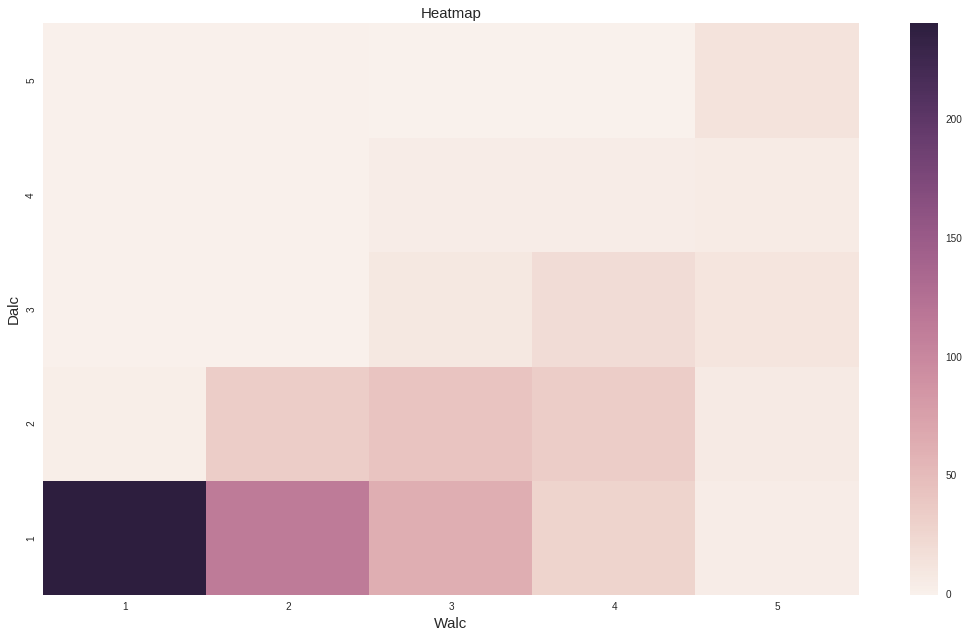

In [4]:
# Смотрим на зависимость между Walc и Dalc
t = np.zeros((5,5))
for i in range(5):
    for j in range(5): t[4-i,j] = ((Dalc==i+1) & (Walc==j+1)).sum()
heatmap(t,xticklabels=np.arange(1,6),yticklabels=np.arange(5,0,-1))
plt.title('Heatmap',fontsize=15)
plt.xlabel('Walc',fontsize=15)
plt.ylabel('Dalc',fontsize=15)
plt.tight_layout()
# plt.savefig('Graphics/Heatmap')

In [5]:
# Бинаризуем многоклассовые признаки
multiclass_features_list = ['Mjob','Fjob','reason','guardian'] # эти категориальные признаки имеют больше двух классов
students = pd.concat([students, pd.get_dummies(students.loc[:,multiclass_features_list]).astype(int)],axis=1)
students = students.drop(multiclass_features_list, axis=1)

# Заменяем значения бинарных текстовых признаков на 0 и 1
students['school'] = students['school'].apply(lambda x: 1 if x=='GP' else 0)
students['sex'] = students['sex'].apply(lambda x: 1 if x=='M' else 0)
students['address'] = students['address'].apply(lambda x: 1 if x=='U' else 0)
students['famsize'] = students['famsize'].apply(lambda x: 1 if x=='GT3' else 0)
students['Pstatus'] = students['Pstatus'].apply(lambda x: 1 if x=='T' else 0)

# Для оставшихся категориальных признаков заменяем yes на 1 и no на 0
bin_features_list = students.columns[students.dtypes=='object'] # выбираем бинарные признаки
le = LabelEncoder(); le.fit(['yes','no'])
for feature in bin_features_list: students[feature] = le.transform(students[feature])

In [6]:
print(students.shape)
print(students.dtypes.values)

(649, 44)
[dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')]


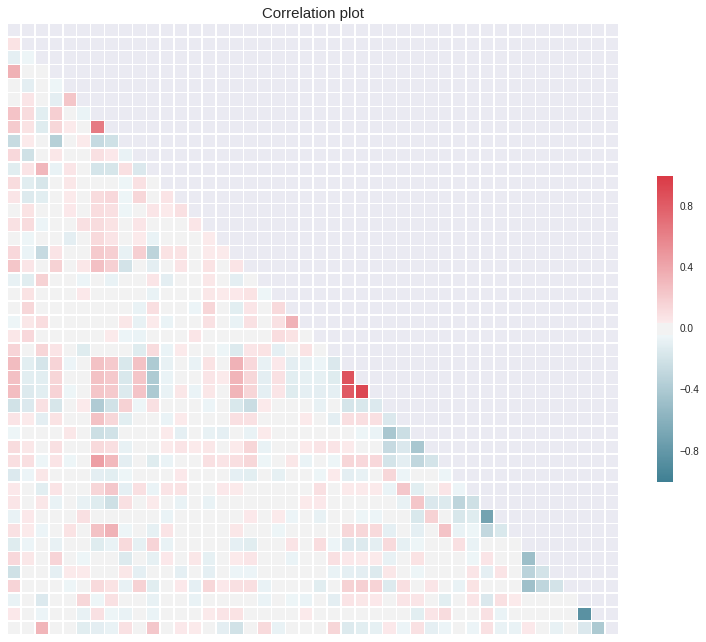

In [7]:
# Теперь все признаки численные, можно построить корреляционную матрицу
corr_data = students.corr()
mask = np.zeros_like(corr_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=1,vmin=-1,
            square=True, xticklabels=False, yticklabels=False,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation plot', fontsize=15)
# plt.yticks(np.arange(students.shape[1]))
plt.tight_layout()

In [8]:
students.columns[6:8],students.columns[24:27]

(Index(['Medu', 'Fedu'], dtype='object'),
 Index(['G1', 'G2', 'G3'], dtype='object'))

In [9]:
print(np.corrcoef(students['Medu'],students['Fedu'])[0,1], np.corrcoef(students['G1'],students['G2'])[0,1],
      np.corrcoef(students['G1'],students['G3'])[0,1], np.corrcoef(students['G2'],students['G3'])[0,1],)

0.647476609136 0.864981630309 0.826387124789 0.91854800356


In [10]:
# Заменим скорелированные признаки на их среднее арифметическое
students['Grade'] = students.loc[:,['G1','G2','G3']].mean(axis=1)
students['Parents_education'] = students.loc[:,['Medu','Fedu']].mean(axis=1)
students = students.drop(['G1','G2','G3','Medu','Fedu'],axis=1)

In [11]:
# Нормализуем тренировочные данные и подготовимся к обучению
ss = StandardScaler()
train = ss.fit_transform(X=students)
Dalc_norm = ss.fit_transform(Dalc.reshape(-1,1).astype('float64')).ravel()
Walc_norm = ss.fit_transform(Walc.reshape(-1,1).astype('float64')).ravel()
mse_scorer = make_scorer(mean_squared_error)
mae_scorer = make_scorer(mean_absolute_error)
ac_scorer = make_scorer(accuracy_score)

def explore_it(estimator,name,target,target_name,plot=True,n_folds=10,regression=True,save=False):
    if regression:
        score_mse = cross_val_score(estimator=estimator,X=train,y=target,cv=n_folds,scoring=mse_scorer).mean()
        score_mae = cross_val_score(estimator=estimator,X=train,y=target,cv=n_folds,scoring=mae_scorer).mean()
    else: score_ac = cross_val_score(estimator=estimator,X=train,y=target,cv=n_folds,scoring=ac_scorer).mean()
    if plot:
        estimator.fit(train,target)
        df = pd.Series(estimator.coef_, index=students.columns).sort_values(ascending=True)
        plt.barh(np.arange(df.shape[0]),df.values)
        plt.ylim(0,df.shape[0])
        plt.yticks(np.arange(df.shape[0])+0.4,df.index)
        plt.title(name+' coefs. '+target_name+'.')
        plt.tight_layout()
        if save: plt.savefig('Graphics/'+name+'_coefs_'+target_name)
    if regression: return {'mse':'%.4f'%score_mse,'mae': '%.4f'%score_mae}, abs(df)/abs(df).sum()
    else: return {'accuracy':'%.4f'%score_ac}

In [12]:
# Проверим, насколько успешно работает логистическая регрессия
log_reg = LogisticRegression()
explore_it(log_reg,'Log_reg',Dalc,'Dalc',plot=False,regression=False)

{'accuracy': '0.6717'}

In [13]:
# Оказывается, что если мы всегда будем предсказывать класс №1, то точность будет больше
(Dalc==1).sum()/Dalc.shape[0]

0.69491525423728817

In [14]:
# Аналогично для потребления алгоколя по выходным
explore_it(log_reg,'Log_reg',Walc,'Walc',plot=False,regression=False)

{'accuracy': '0.3569'}

In [15]:
(Walc==1).sum()/Walc.shape[0]

0.38058551617873654

Рассмотрим линейные модели.  
Линейная регрессия минимизирует функцию потерь
$ Q = \sum_{i=1}^n(Y_i-X_i\beta)^2$  
В случае Ridge-регрессии:
$ Q = \sum_{i=1}^n(Y_i-X_i\beta)^2+\alpha\sum_{j=1}^p\beta_j^2$  
Для Lasso:
$ Q = \sum_{i=1}^n(Y_i-X_i\beta)^2+\alpha\sum_{j=1}^p|\beta_j|$

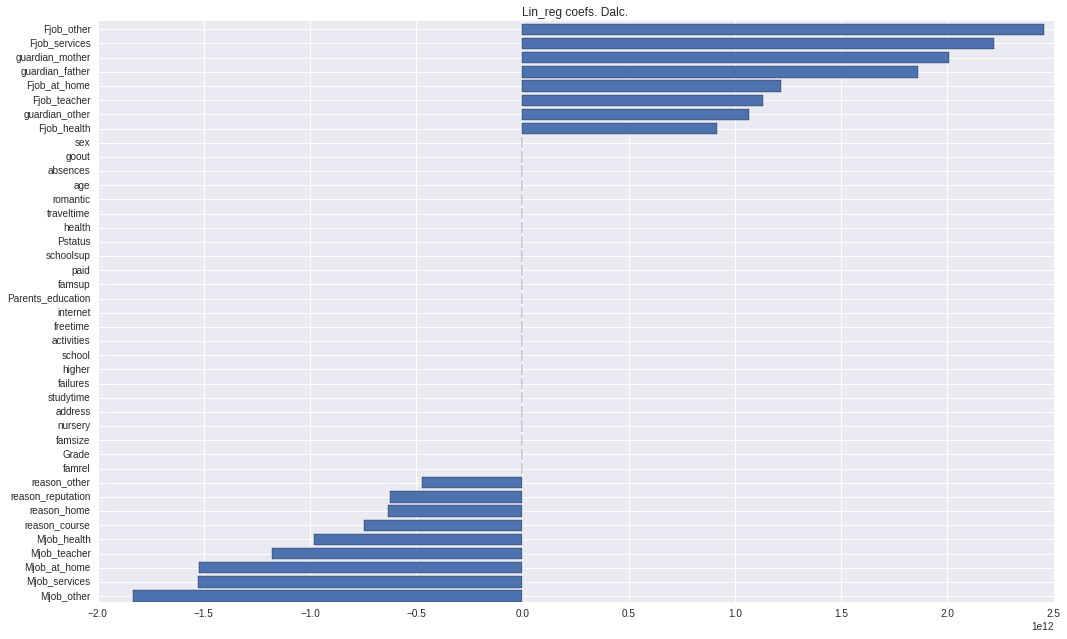

In [16]:
lin_reg = LinearRegression(fit_intercept=False)
score_lin_reg_dalc, lin_reg_importances_dalc = explore_it(lin_reg,'Lin_reg',Dalc_norm,'Dalc',plot=True)

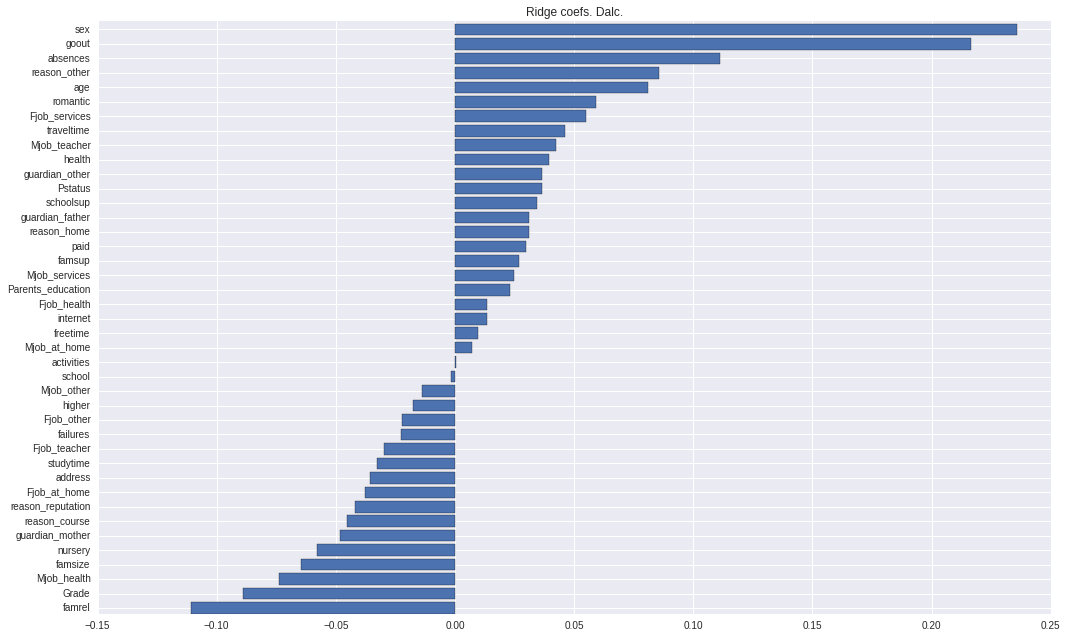

In [17]:
ridge = Ridge(fit_intercept=False)
score_ridge_dalc, ridge_importances_dalc = explore_it(ridge,'Ridge',Dalc_norm,'Dalc',plot=True)

In [18]:
# По умолчанию у Lasso оказалась слишком сильная регуляризация
lasso = Lasso(fit_intercept=False)
lasso.fit(train,Dalc)
lasso.coef_

array([-0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,
       -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,  0.,
       -0., -0.])

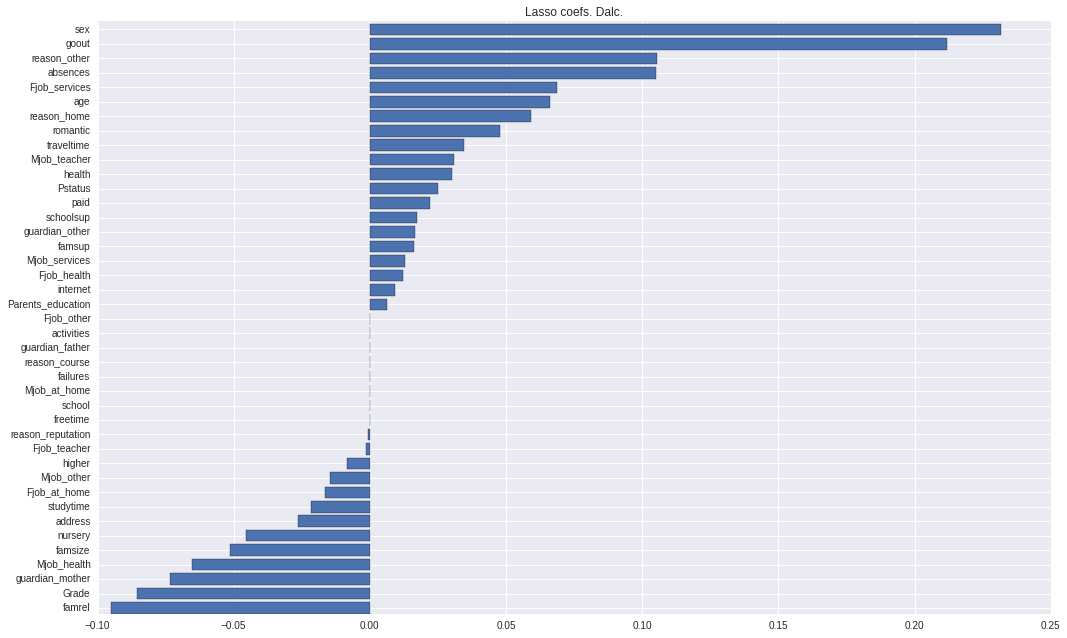

In [19]:
lasso = Lasso(alpha=0.01,fit_intercept=False)
score_lasso_dalc, lasso_importances_dalc = explore_it(lasso,'Lasso',Dalc_norm,'Dalc',plot=True)

**Построим аналогичные графики для Выходных**

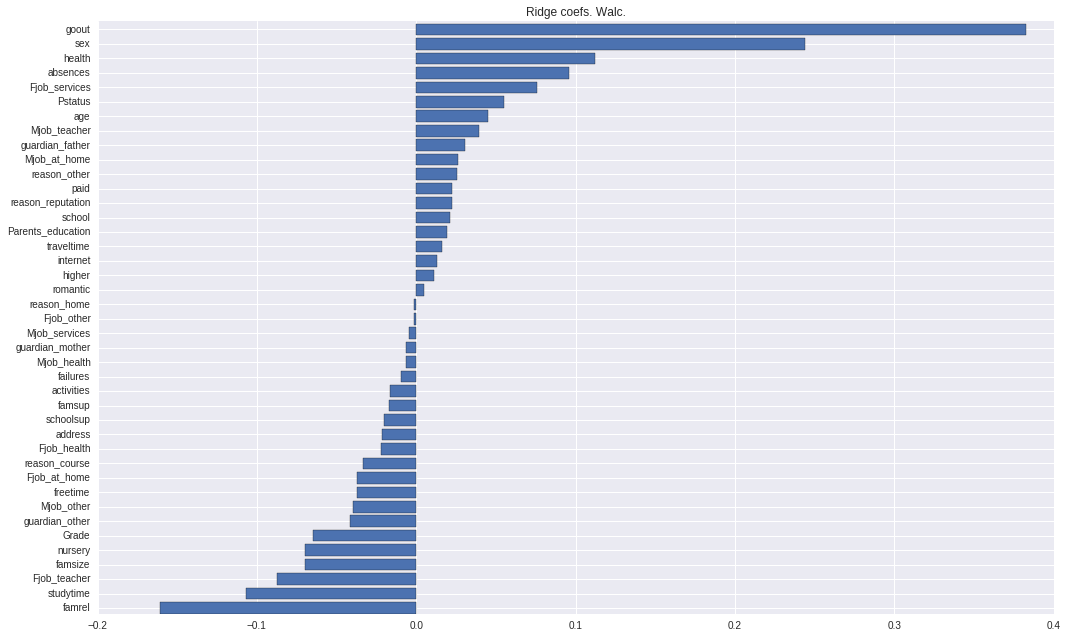

In [20]:
ridge = Ridge(fit_intercept=False)
score_ridge_walc, ridge_importances_walc = explore_it(ridge,'Ridge',Walc_norm,'Walc',plot=True)

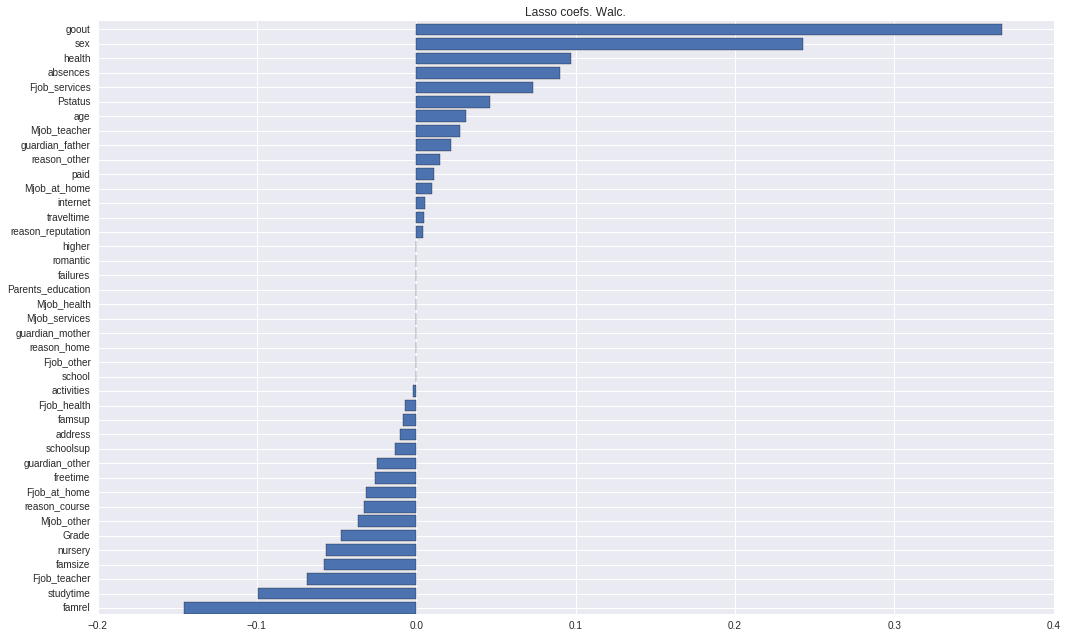

In [21]:
lasso = Lasso(alpha=0.01,fit_intercept=False)
score_lasso_walc, lasso_importances_walc = explore_it(lasso,'Lasso',Walc_norm,'Walc',plot=True)

In [22]:
print('Dalc. Lin_reg',score_lin_reg_dalc)
print('Dalc. Ridge  ', score_ridge_dalc)
print('Dalc. Lasso  ', score_lasso_dalc)

Dalc. Lin_reg {'mae': '0.6549', 'mse': '0.8575'}
Dalc. Ridge   {'mae': '0.6554', 'mse': '0.8571'}
Dalc. Lasso   {'mae': '0.6468', 'mse': '0.8417'}


In [23]:
print('Walc. Ridge  ', score_ridge_walc)
print('Walc. Lasso  ', score_lasso_walc)

Walc. Ridge   {'mae': '0.7126', 'mse': '0.7530'}
Walc. Lasso   {'mae': '0.7075', 'mse': '0.7373'}


Если всегда предсказывать 0, то получим mse = 1.

In [24]:
# Рассмотрим алгоритм Random Forest
rf = RandomForestClassifier()
n_estimators_range = 2 ** np.arange(8)
max_depth_range = np.arange(1,15,2)
param_grid = dict(n_estimators=n_estimators_range,max_depth=max_depth_range)
gs = GridSearchCV(rf,param_grid,cv=10,scoring=ac_scorer)
gs.fit(train,Dalc)
gs.best_score_

0.7010785824345146

In [25]:
mse_scorer = make_scorer(mean_squared_error,greater_is_better=False)
rf = RandomForestRegressor()
n_estimators_range = 2 ** np.arange(8)
max_depth_range = np.arange(1,13,1)
param_grid = dict(n_estimators=n_estimators_range,max_depth=max_depth_range)
gs = GridSearchCV(rf,param_grid,cv=10,scoring=mse_scorer)
gs.fit(train,Dalc_norm)
print(gs.best_params_)
print(-gs.best_score_)

{'n_estimators': 16, 'max_depth': 3}
0.800675519243


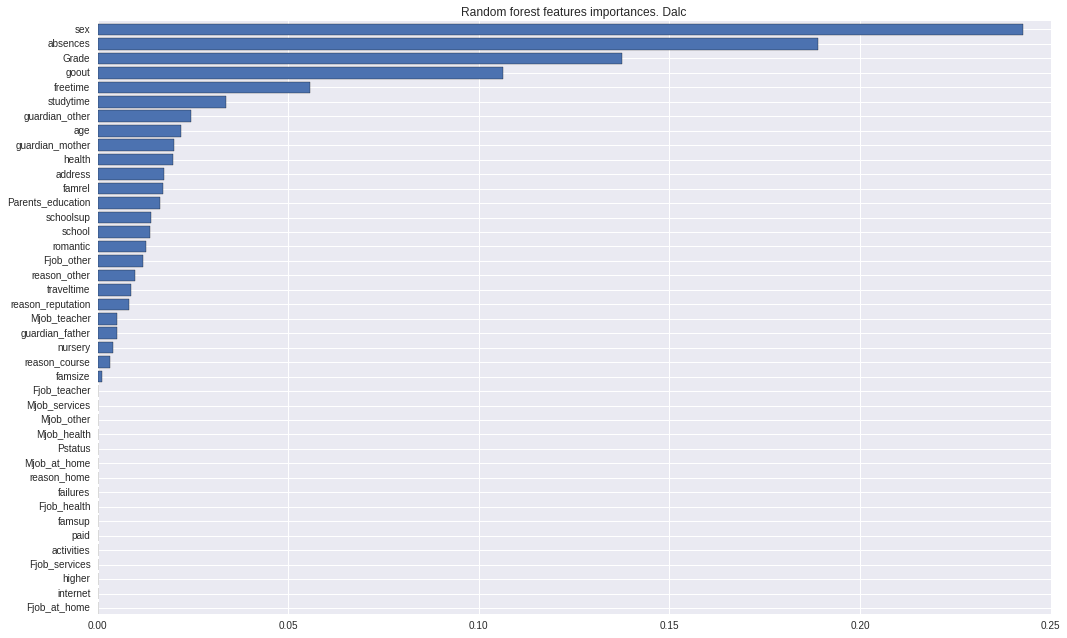

In [26]:
rf_best_dalc = RandomForestRegressor(n_estimators=gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'])
rf_best_dalc.fit(train,Dalc_norm)
rf_importances_dalc = pd.Series(rf_best_dalc.feature_importances_, index=students.columns).sort_values()
plt.barh(np.arange(rf_importances_dalc.shape[0]), rf_importances_dalc.values)
plt.ylim(0, rf_importances_dalc.shape[0])
plt.yticks(np.arange(rf_importances_dalc.shape[0]) + 0.4, rf_importances_dalc.index)
plt.title('Random forest features importances. Dalc')
plt.tight_layout()

In [27]:
# Аналогично для Walc
gs.fit(train,Walc_norm)
print(gs.best_params_)
print(-gs.best_score_)

{'n_estimators': 32, 'max_depth': 3}
0.749440630648


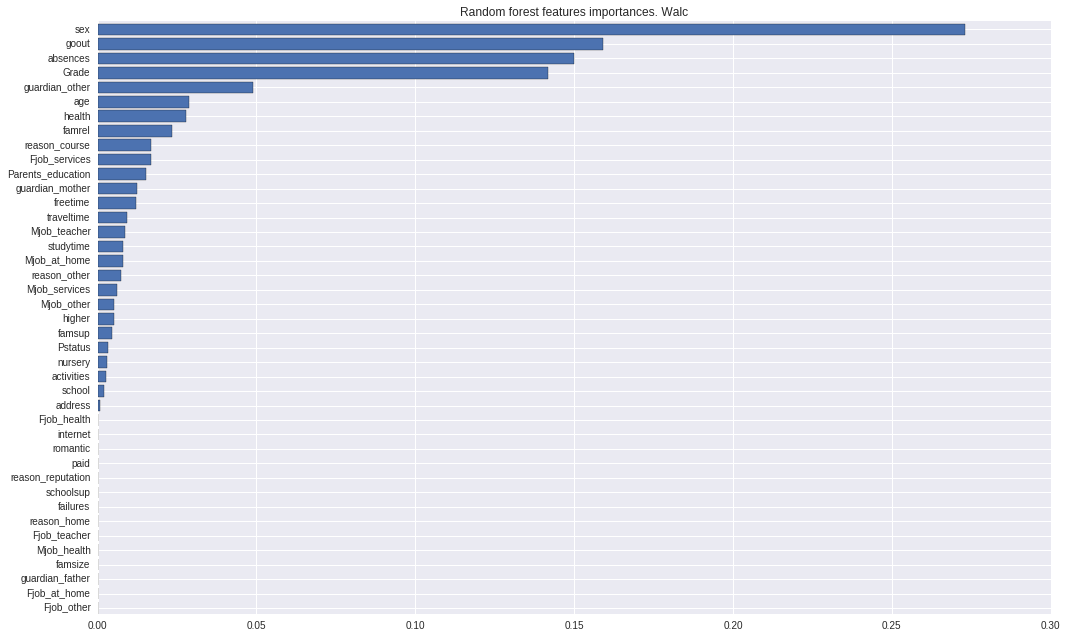

In [28]:
rf_best_walc = RandomForestRegressor(n_estimators=gs.best_params_['n_estimators'],max_depth=gs.best_params_['max_depth'])
rf_best_walc.fit(train,Dalc_norm)
rf_importances_walc = pd.Series(rf_best_walc.feature_importances_, index=students.columns).sort_values()
plt.barh(np.arange(rf_importances_walc.shape[0]), rf_importances_walc.values)
plt.ylim(0, rf_importances_walc.shape[0])
plt.yticks(np.arange(rf_importances_walc.shape[0]) + 0.4, rf_importances_walc.index)
plt.title('Random forest features importances. Walc')
plt.tight_layout()

In [29]:
dtrain = xgb.DMatrix(students,Dalc_norm)
for depth in range(1,7):
    params = {"booster": "gbtree",
              "objective": "reg:linear",
              "eta": 0.1,
              "max_depth": depth,
              "subsample": 0.98,
              "colsample_bytree": 0.98,
              "silent": 1,
              "seed": 2,
              "eval_metric": 'rmse',
              }
    t = xgb.cv(params,dtrain,num_boost_round=70,nfold=10,early_stopping_rounds=10)
    print(depth,t['test-rmse-mean'].values[-1]**2)#, t.shape[0])

1 0.828895530969
2 0.781250571902
3 0.795634921066
4 0.810182530282
5 0.860133638869
6 0.872718616475


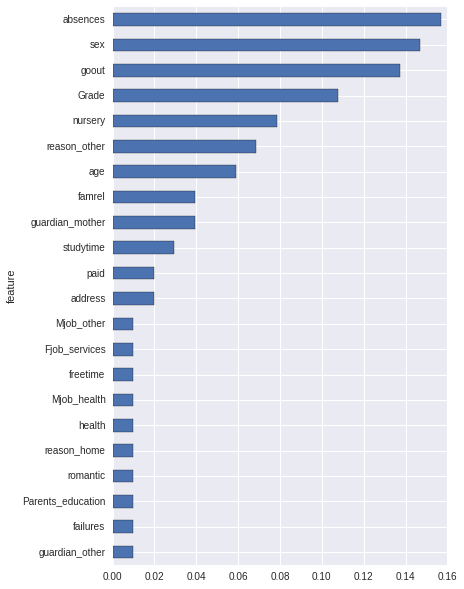

In [30]:
x_train, x_val, y_train, y_val = train_test_split(students, Dalc, test_size = 0.2, random_state=0)
params['max_depth'] = 2
dtrain = xgb.DMatrix(x_train,y_train)
dval = xgb.DMatrix(x_val,y_val)
watchlist = [([dval,'val'])]
gbm = xgb.train(params,dtrain,70,watchlist,early_stopping_rounds=5, verbose_eval=False)
# Смотрим на важности признаков xgboost'а
importance = gbm.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
xgb_importances_dalc = pd.DataFrame(importance, columns=['feature', 'fscore'])
xgb_importances_dalc['fscore'] = xgb_importances_dalc['fscore'] / xgb_importances_dalc['fscore'].sum()
featp = xgb_importances_dalc.iloc[-50:,].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
xgb_importances_dalc = xgb_importances_dalc.set_index('feature');

In [31]:
# Повторим для Walc
dtrain = xgb.DMatrix(students,Walc_norm)
for depth in range(1,7):
    params = {"booster": "gbtree",
              "objective": "reg:linear",
              "eta": 0.1,
              "max_depth": depth,
              "subsample": 0.98,
              "colsample_bytree": 0.98,
              "silent": 1,
              "seed": 2,
              "eval_metric": 'rmse',
              }
    t = xgb.cv(params,dtrain,num_boost_round=70,nfold=10,early_stopping_rounds=10)
    print(depth,t['test-rmse-mean'].values[-1]**2)

1 0.74626913084
2 0.731959813662
3 0.745411383058
4 0.74986957569
5 0.769680556447
6 0.804287726677


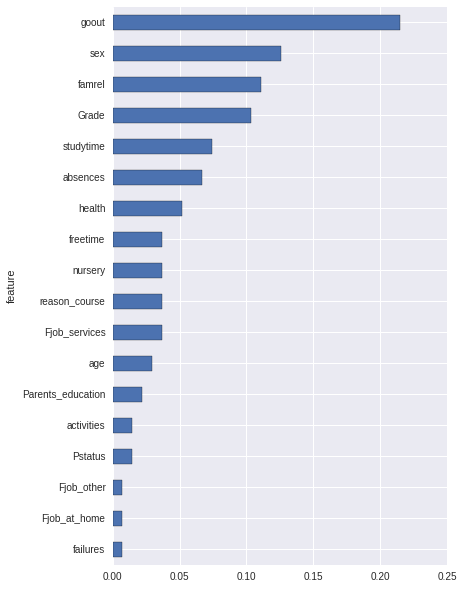

In [32]:
x_train, x_val, y_train, y_val = train_test_split(students, Walc, test_size = 0.2, random_state=0)
params['max_depth'] = 2
dtrain = xgb.DMatrix(x_train,y_train)
dval = xgb.DMatrix(x_val,y_val)
watchlist = [([dval,'val'])]
gbm = xgb.train(params,dtrain,70,watchlist,early_stopping_rounds=5, verbose_eval=False)
# Смотрим на важности признаков xgboost'а
importance = gbm.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
xgb_importances_walc = pd.DataFrame(importance, columns=['feature', 'fscore'])
xgb_importances_walc['fscore'] = xgb_importances_walc['fscore'] / xgb_importances_walc['fscore'].sum()
featp = xgb_importances_walc.iloc[-50:,].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
xgb_importances_walc = xgb_importances_walc.set_index('feature');

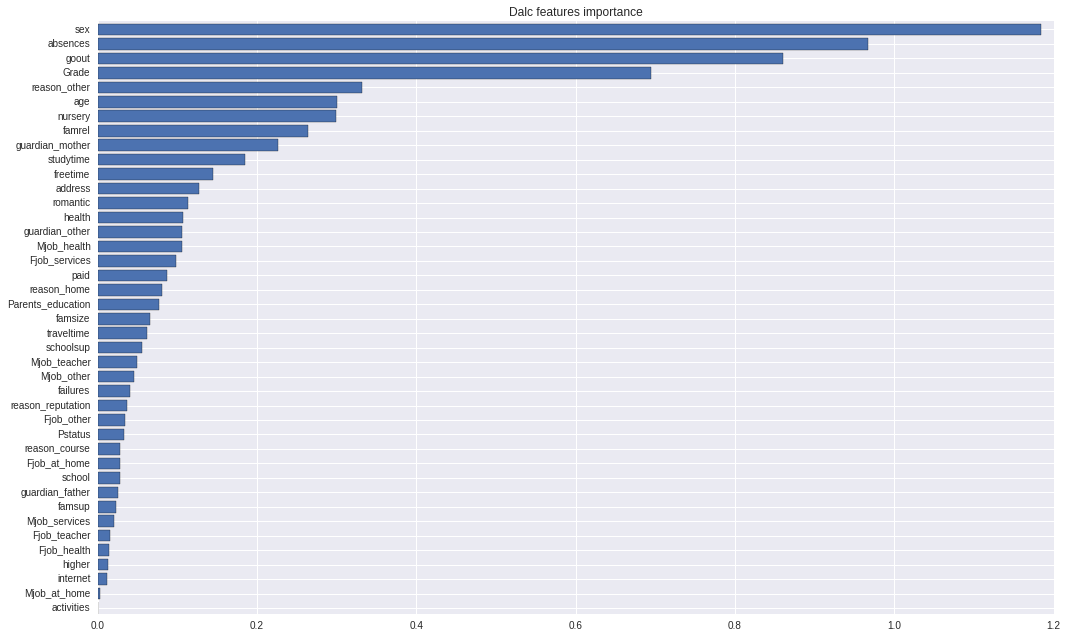

In [34]:
dalc_importances = ridge_importances_dalc + lasso_importances_dalc + 2*rf_importances_dalc
dalc_importances[xgb_importances_dalc.index]+=3*xgb_importances_dalc.values.ravel()
dalc_importances = dalc_importances.sort_values(ascending=True)
plt.barh(np.arange(dalc_importances.shape[0]),dalc_importances.values)
plt.ylim(0,dalc_importances.shape[0])
plt.yticks(np.arange(dalc_importances.shape[0])+0.4,dalc_importances.index)
plt.title('Dalc features importance')
plt.tight_layout()

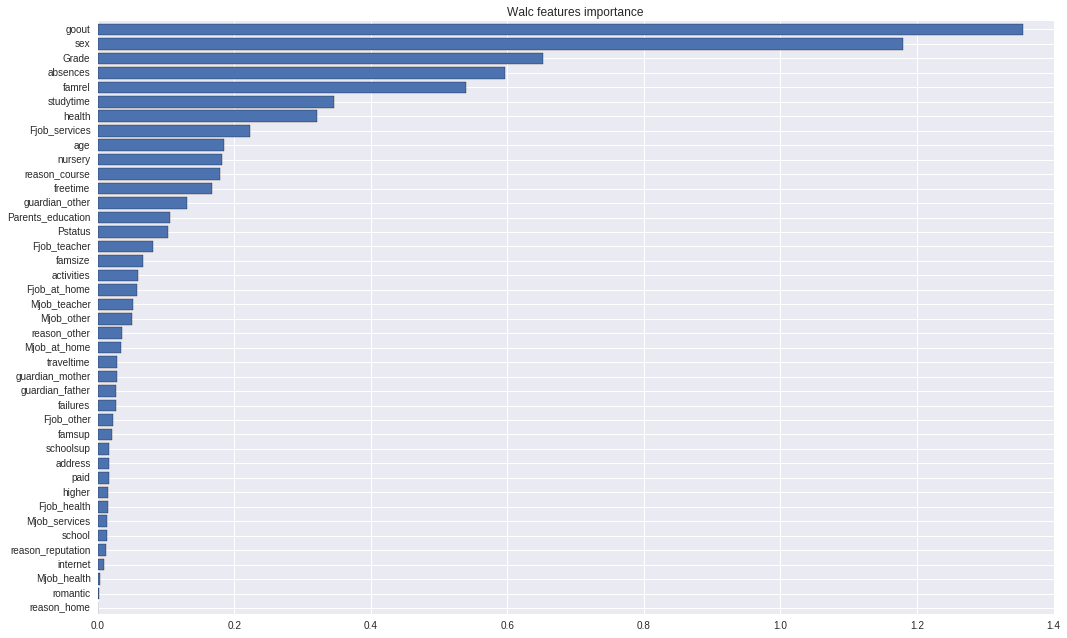

In [35]:
walc_importances = ridge_importances_walc + lasso_importances_walc + 2*rf_importances_walc
walc_importances[xgb_importances_walc.index]+=3*xgb_importances_walc.values.ravel()
walc_importances = walc_importances.sort_values(ascending=True)
plt.barh(np.arange(walc_importances.shape[0]),walc_importances.values)
plt.ylim(0,walc_importances.shape[0])
plt.yticks(np.arange(walc_importances.shape[0])+0.4,walc_importances.index)
plt.title('Walc features importance')
plt.tight_layout()

In [38]:
# Оставим только наиболее важные признаки
# important_features = (walc_importances + dalc_importances)[walc_importances + dalc_importances>0.8].index
important_features_dalc = dalc_importances[dalc_importances>0.2].index
print(important_features_dalc)

train_new = ss.fit_transform(students.loc[:,important_features_dalc])
mse_scorer = make_scorer(mean_squared_error)
ridge_score = cross_val_score(estimator=ridge,X=train_new,y=Dalc_norm,cv=10,scoring=mse_scorer).mean()
lasso_score = cross_val_score(estimator=lasso,X=train_new,y=Dalc_norm,cv=10,scoring=mse_scorer).mean()
print(ridge_score,lasso_score)

Index(['guardian_mother', 'famrel', 'nursery', 'age', 'reason_other', 'Grade',
       'goout', 'absences', 'sex'],
      dtype='object')
0.807867243205 0.808832874367


Ранее mse было ~0,84, теперь -- ~0,81

In [41]:
important_features_walc = walc_importances[walc_importances>0.07].index
print(important_features_walc)

train_new = ss.fit_transform(students.loc[:,important_features_walc])
mse_scorer = make_scorer(mean_squared_error)
ridge_score = cross_val_score(estimator=ridge,X=train_new,y=Walc_norm,cv=10,scoring=mse_scorer).mean()
lasso_score = cross_val_score(estimator=lasso,X=train_new,y=Walc_norm,cv=10,scoring=mse_scorer).mean()
print(ridge_score,lasso_score)

Index(['Fjob_teacher', 'Pstatus', 'Parents_education', 'guardian_other',
       'freetime', 'reason_course', 'nursery', 'age', 'Fjob_services',
       'health', 'studytime', 'famrel', 'absences', 'Grade', 'sex', 'goout'],
      dtype='object')
0.709365841605 0.711292311517


Ранее mse было ~0,74, теперь -- ~0,71

# Вывод
По предоставленным данным действительно можно предсказать меру употребления алкоголя для школьника как в рабочие дни, так и в выходные, с mse порядка 0.7--0.8.
Более того, как показало исследование, для предсказания не обязателльно обладать ~30 признаками для каждого школьника, достаточно собрать около 10 самых важных, причём качество предсказаний только увеличиться.  
Самыми важными признаками оказались:
1. Пол
2. Количество времени, проведённого с друзьями
3. Успеваемость
4. Прогулы
5. Отношения между родителями
6. Возраст

## Что можно улучшить
1. Поэкспериментировать с другими алгоритмами (KNN, AdaBoost, NeuralNets).
2. Попробовать стекинг.
3. Провести аналогичное исследование для школьников, изучающих математику.


